## 1. Library

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from warnings import simplefilter
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [ ]:
def eval(evaluation,y_true,y_train_pred,name):
  a_dict = {}
  a_dict['MAE'] = mean_absolute_error(y_true,y_train_pred)
  a_dict['MSE'] = mean_squared_error(y_true,y_train_pred)
  a_dict['MAPE']= round(mean_absolute_percentage_error(y_true,y_train_pred),6)
  a_dict['R squared'] = r2_score(y_true,y_train_pred)
  a_dict['RMSE'] = np.sqrt(mean_squared_error(y_true,y_train_pred))
  a_dict['RMSLE'] = np.log(np.sqrt(mean_squared_error(y_true,y_train_pred)))
  evaluation[name] = a_dict

## 2. Dataset

In [ ]:
df = pd.read_csv(
    "Rice-Data-2018-2021.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.head()

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2018-01-01                            9792.59                    0.54   
2018-02-01                            9987.10                    1.07   
2018-03-01                            9554.06                    1.77   
2018-04-01                            8991.36                    1.41   
2018-05-01                            9001.50                    1.00   

            Produksi Padi Nasional (10^6 Ton)  \
Date                                            
2018-01-01                               2.78   
2018-02-01                               5.74   
2018-03-01                               9.68   
2018-04-01                               7.60   
2018-05-01                               4.90   

            Produksi Beras Nasional (10^6 Ton)  Productivity (ku/ha)  
Date                                                                  
2018-01-01                                1.59                 51.48  
2018-02-01                                3.29                 53.64  
2018-03-01                                5.55                 54.69  
2018-04-01                                4.36                 53.90  
2018-05-01                                2.81                 49.00

In [ ]:
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 
df['Month'] = df['Date'].dt.month
df['Time'] = np.arange(len(df.index))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-01-01 to 2021-12-01
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Average Price of Premium Quality Rice  48 non-null     float64       
 1   Average Price of Medium Quality Rice   48 non-null     float64       
 2   Average Price of Bad Quality Rice      48 non-null     float64       
 3   Harvest Area (10^6 ha)                 48 non-null     float64       
 4   Produksi Padi Nasional (10^6 Ton)      48 non-null     float64       
 5   Produksi Beras Nasional (10^6 Ton)     48 non-null     float64       
 6   Productivity (ku/ha)                   48 non-null     float64       
 7   Date                                   48 non-null     datetime64[ns]
 8   Month                                  48 non-null     int64         
 9   Time                                   48 non-n

In [ ]:
df

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   
2018-06-01                                9478.05   
2018-07-01                                9519.93   
2018-08-01                                9458.07   
2018-09-01                                9572.03   
2018-10-01                                9645.30   
2018-11-01                                9770.97   
2018-12-01                                9818.07   
2019-01-01                               10111.08   
2019-02-01                               10007.91   
2019-03-01                                9814.53   
2019-04-01                                9464.68   
2019-05-01                                9462.05   
2019-06-01                                9515.51   
2019-07-01                                9519.35   
2019-08-01                                9530.00   
2019-09-01                                9594.39   
2019-10-01                                9659.17   
2019-11-01                                9742.16   
2019-12-01                                9838.26   
2020-01-01                               10032.66   
2020-02-01                               10080.80   
2020-03-01                               10082.43   
2020-04-01                               10018.19   
2020-05-01                                9826.63   
2020-06-01                                9918.95   
2020-07-01                                9931.71   
2020-08-01                                9962.65   
2020-09-01                                9871.12   
2020-10-01                                9812.90   
2020-11-01                                9714.50   
2020-12-01                                9787.86   
2021-01-01                                9780.19   
2021-02-01                                9772.10   
2021-03-01                                9606.97   
2021-04-01                                9549.76   
2021-05-01                                9627.08   
2021-06-01                                9537.16   
2021-07-01                                9401.61   
2021-08-01                                9499.36   
2021-09-01                                9455.56   
2021-10-01                                9449.47   
2021-11-01                                9539.29   
2021-12-01                                9672.54   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   
2018-06-01                               9135.41   
2018-07-01                               9197.78   
2018-08-01                               9172.27   
2018-09-01                               9309.98   
2018-10-01                               9395.39   
2018-11-01                               9603.63   
2018-12-01                               9798.38   
2019-01-01                               9902.68   
2019-02-01                               9799.57   
2019-03-01                               9555.35   
2019-04-01                               9144.20   
2019-05-01                               9142.52   
2019-06-01                               9166.40   
2019-07-01                               9211.03   
2019-08-01                               9224.00   
2019-09-01                               9301.08   
2019-10-01                               9433.88   
2019-11-01                               9522.01   
2019-12-01                               9565.59   
2020-01-0

In [ ]:
df.describe()

Average Price of Premium Quality Rice  \
count                              48.000000   
mean                             9731.792708   
std                               240.875355   
min                              9401.610000   
25%                              9524.690000   
50%                              9693.520000   
75%                              9876.480000   
max                             10381.740000   

       Average Price of Medium Quality Rice  \
count                             48.000000   
mean                            9379.253333   
std                              323.596826   
min                             8886.900000   
25%                             9151.310000   
50%                             9358.795000   
75%                             9557.910000   
max                            10215.160000   

       Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
count                          48.000000               48.000000   
mean                         9085.215000                0.896458   
std                           317.174428                0.417294   
min                          8481.430000                0.290000   
25%                          8929.802500                0.562500   
50%                          9020.305000                0.840000   
75%                          9246.850000                1.075000   
max                          9987.100000                1.860000   

       Produksi Padi Nasional (10^6 Ton)  Produksi Beras Nasional (10^6 Ton)  \
count                          48.000000                           48.000000   
mean                            4.645833                            2.665208   
std                             2.186646                            1.270172   
min                             1.620000                            0.930000   
25%                             3.200000                            1.800000   
50%                             4.195000                            2.450000   
75%                             5.450000                            3.187500   
max                             9.680000                            5.600000   

       Productivity (ku/ha)      Month   Time  
count             48.000000  48.000000  48.00  
mean              52.968958   6.500000  23.50  
std                9.761144   3.488583  14.00  
min               30.380000   1.000000   0.00  
25%               49.615000   3.750000  11.75  
50%               51.490000   6.500000  23.50  
75%               54.022500   9.250000  35.25  
max               86.380000  12.000000  47.00

# 3. Exploratory Data Analysis (EDA)

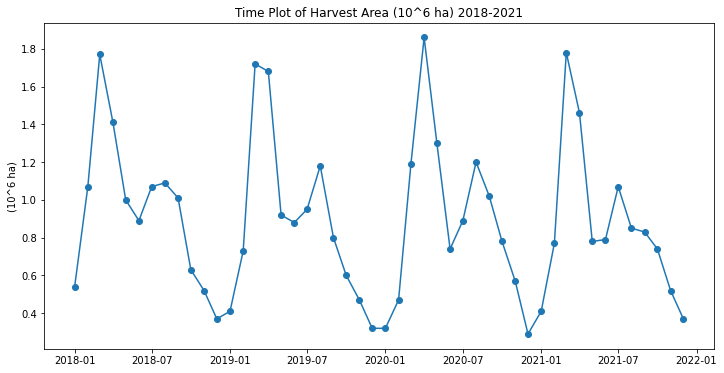

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Harvest Area (10^6 ha)'],marker='o') 
plt.title('Time Plot of Harvest Area (10^6 ha) 2018-2021')
plt.ylabel("(10^6 ha)")
plt.show()

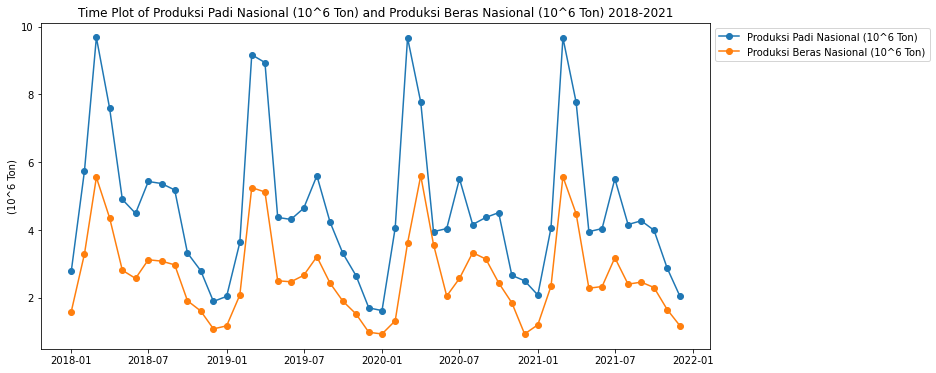

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Produksi Padi Nasional (10^6 Ton)'],marker='o',label = 'Produksi Padi Nasional (10^6 Ton)') 
plt.plot(df['Produksi Beras Nasional (10^6 Ton)'],marker='o',label = 'Produksi Beras Nasional (10^6 Ton)') 
plt.title('Time Plot of Produksi Padi Nasional (10^6 Ton) and Produksi Beras Nasional (10^6 Ton) 2018-2021')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.ylabel("(10^6 Ton)")
plt.show()

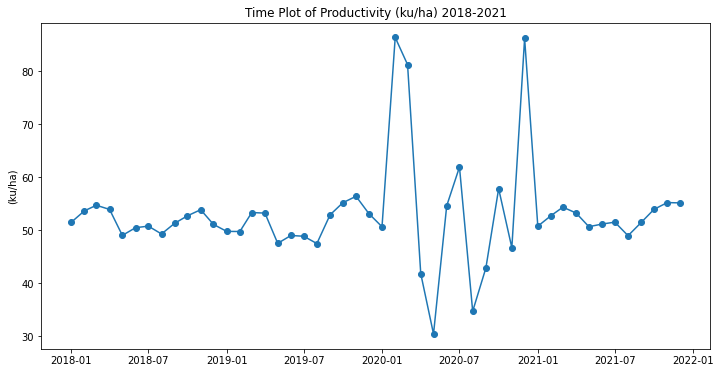

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Productivity (ku/ha)'],marker='o') 
plt.title('Time Plot of Productivity (ku/ha) 2018-2021')
plt.ylabel("(ku/ha)")
plt.show()

In [ ]:
df = df.drop(columns=['Date'])

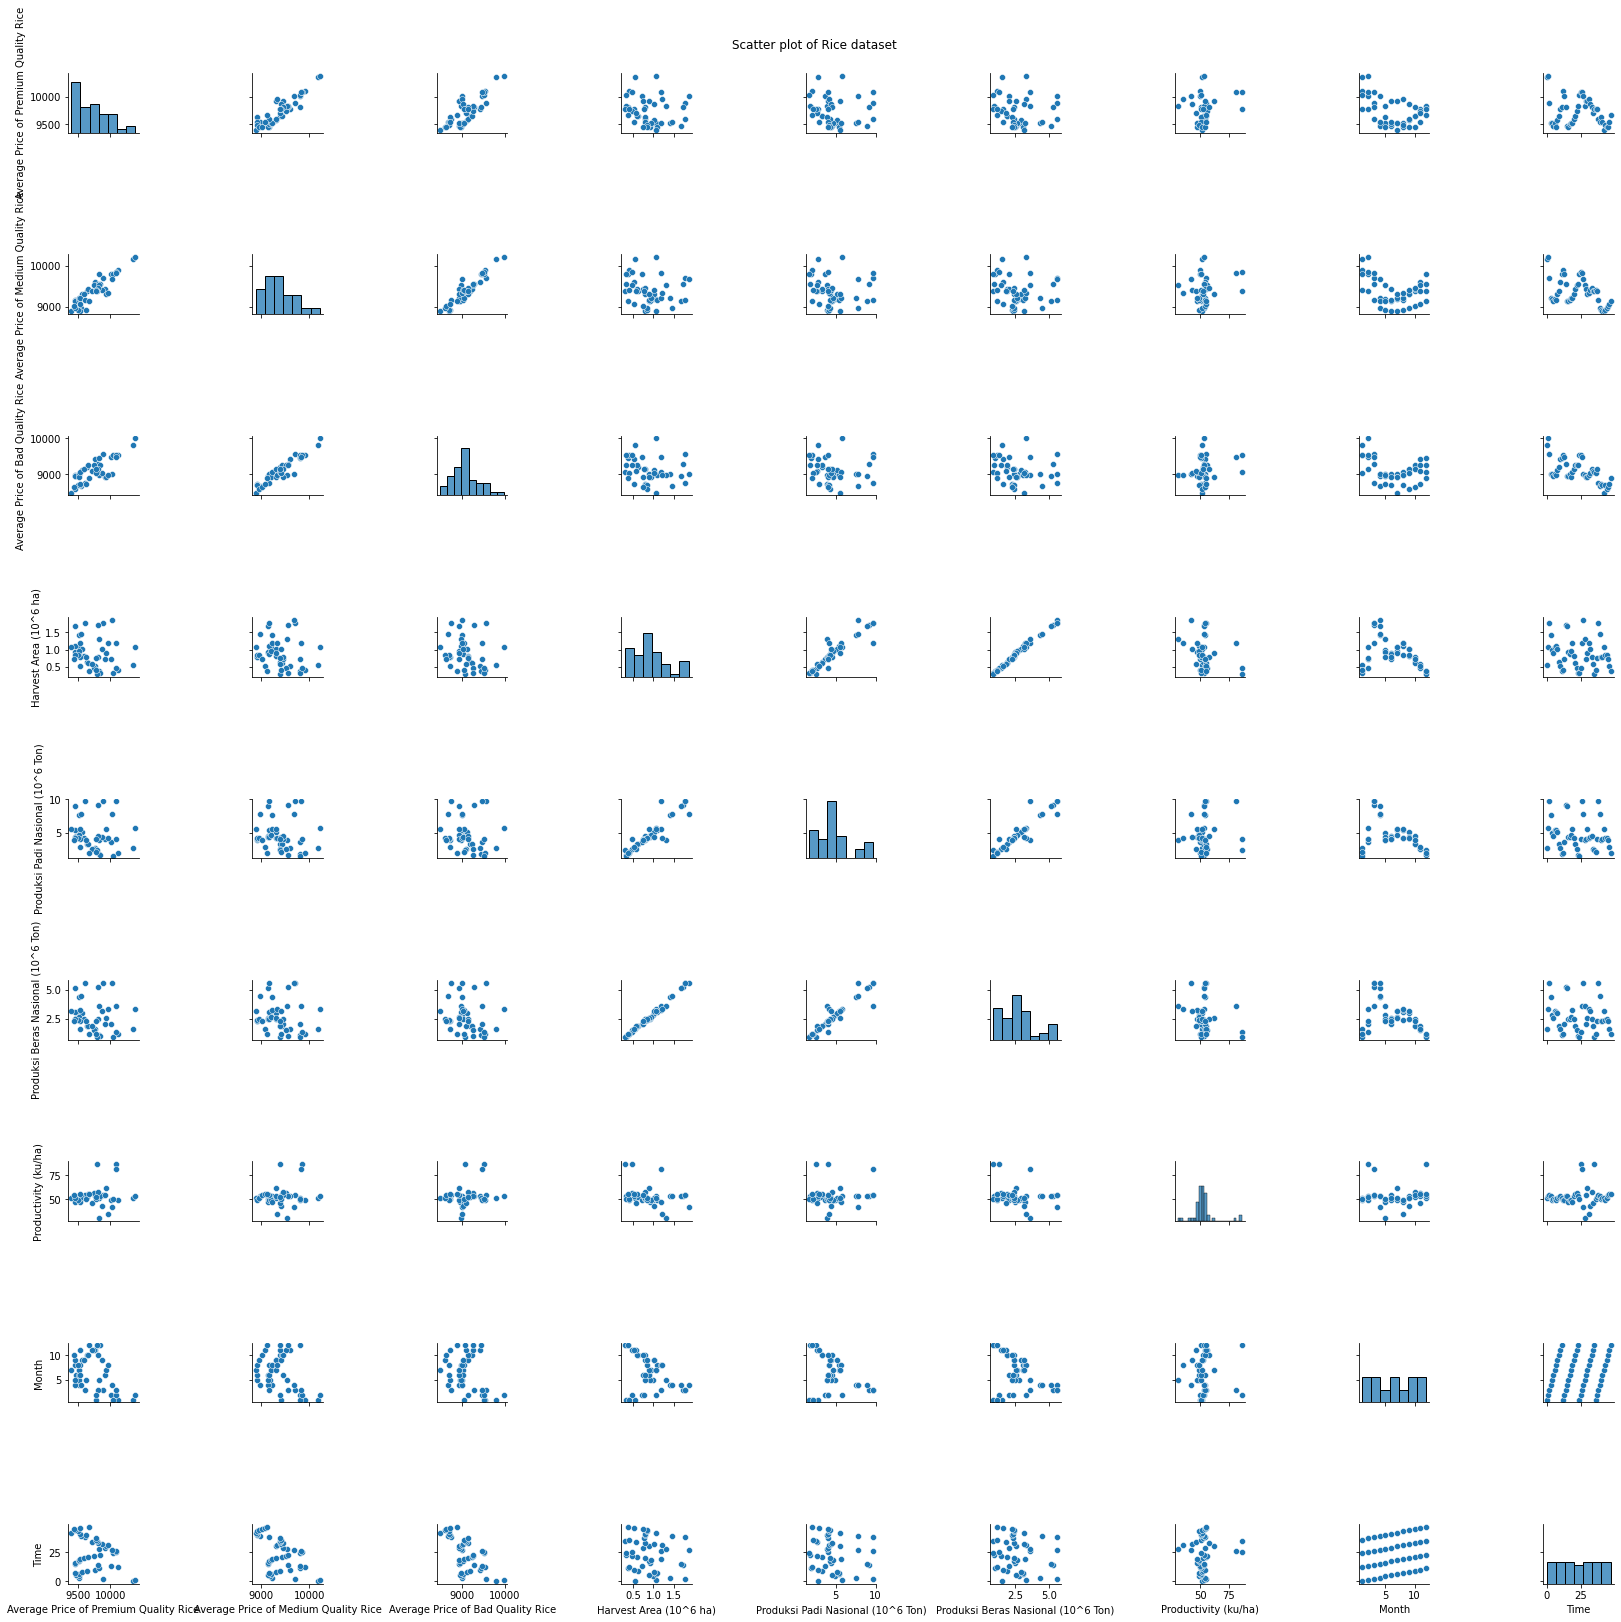

In [ ]:
df_plot = df.copy()

g = sns.pairplot(df_plot)
g.fig.suptitle('Scatter plot of Rice dataset')
plt.tight_layout()
plt.show()

    From the results of the Scatter plots above, the following analysis results are obtained: 
    There are several features that have a linear relationship, 
    namely the relationship between Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Average Price of Bad Quality Rice. 
    In addition, between harvest area, National Rice Production, and National Rice Production. 
    As well as between time and month.

# 4. Feature Engineering

## Feature Scalling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscalar_premium = MinMaxScaler()
df[['Average Price of Premium Quality Rice']] = mmscalar_premium.fit_transform(df[['Average Price of Premium Quality Rice']])

In [ ]:
mmscalar_medium = MinMaxScaler()
df[['Average Price of Medium Quality Rice']] = mmscalar_medium.fit_transform(df[['Average Price of Medium Quality Rice']])

In [ ]:
mmscalar_bad = MinMaxScaler()
df[['Average Price of Bad Quality Rice']] = mmscalar_bad.fit_transform(df[['Average Price of Bad Quality Rice']])

In [ ]:
mmscalar_prod = MinMaxScaler()
df[['Productivity (ku/ha)']] = mmscalar_prod.fit_transform(df[['Productivity (ku/ha)']])

##  Correlation Matrix

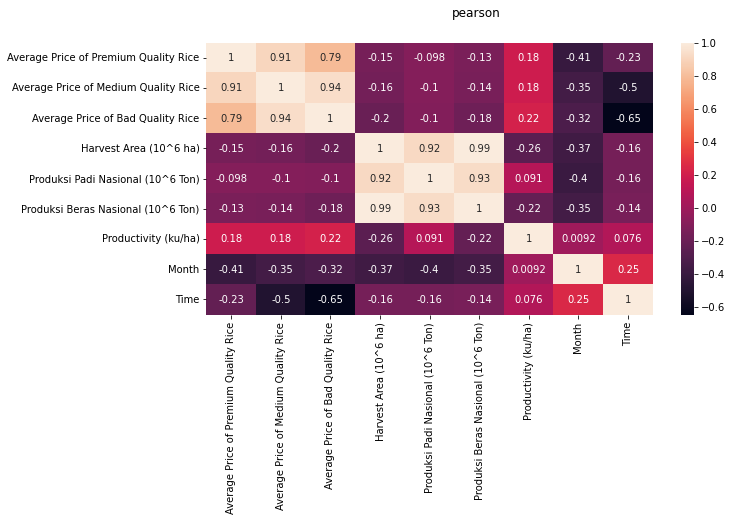

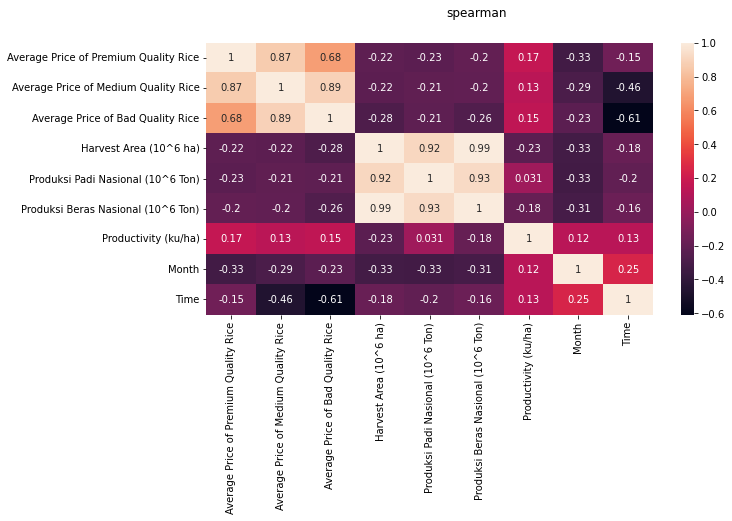

In [ ]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(10,5))
    fig.suptitle(item)
    sns.heatmap(df.corr(method=item, numeric_only=True), annot=True)
    plt.show()


# 4.1 Correlation for Average Price of Premium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.906342
Average Price of Bad Quality Rice        0.787889
Productivity (ku/ha)                     0.184831
Produksi Padi Nasional (10^6 Ton)       -0.097793
Produksi Beras Nasional (10^6 Ton)      -0.132439
Harvest Area (10^6 ha)                  -0.145494
Time                                    -0.228418
Month                                   -0.407455
Name: Average Price of Premium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Medium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Premium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.866913
Average Price of Bad Quality Rice        0.682914
Productivity (ku/ha)                     0.168802
Time                                    -0.149370
Produksi Beras Nasional (10^6 Ton)      -0.199593
Harvest Area (10^6 ha)                  -0.218753
Produksi Padi Nasional (10^6 Ton)       -0.230788
Month                                   -0.327599
Name: Average Price of Premium Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Premium Quality Rice are similar

# 4.2 Correlation for Average Price of Medium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.939900
Average Price of Premium Quality Rice    0.906342
Productivity (ku/ha)                     0.184865
Produksi Padi Nasional (10^6 Ton)       -0.099594
Produksi Beras Nasional (10^6 Ton)      -0.144158
Harvest Area (10^6 ha)                  -0.159867
Month                                   -0.354664
Time                                    -0.504250
Name: Average Price of Medium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Medium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.892097
Average Price of Premium Quality Rice    0.866913
Productivity (ku/ha)                     0.130699
Produksi Beras Nasional (10^6 Ton)      -0.203664
Produksi Padi Nasional (10^6 Ton)       -0.210375
Harvest Area (10^6 ha)                  -0.223097
Month                                   -0.291006
Time                                    -0.464611
Name: Average Price of Medium Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Medium Quality Rice Rice are similar

# 4.3 Correlation for Average Price of Bad Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.939900
Average Price of Premium Quality Rice    0.787889
Productivity (ku/ha)                     0.216919
Produksi Padi Nasional (10^6 Ton)       -0.104705
Produksi Beras Nasional (10^6 Ton)      -0.180882
Harvest Area (10^6 ha)                  -0.198405
Month                                   -0.317138
Time                                    -0.646867
Name: Average Price of Bad Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Bad Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.892097
Average Price of Premium Quality Rice    0.682914
Productivity (ku/ha)                     0.145571
Produksi Padi Nasional (10^6 Ton)       -0.213144
Month                                   -0.225660
Produksi Beras Nasional (10^6 Ton)      -0.263591
Harvest Area (10^6 ha)                  -0.280867
Time                                    -0.608554
Name: Average Price of Bad Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Bad Quality Rice Rice are similar

# 5. Split dataset to train and test datasets
    df_train is rice data from 2018-2020
    df_test is rice data in 2021

In [ ]:
df_train = df.iloc[:36,:]
df_test = df.iloc[36:,:]

In [ ]:
# Training data
Time_train = df_train.loc[:, ['Time']]  # features
Monthly_train = df_train.loc[:, ['Month']]  # features
x_premium_train = df_train.loc[:, df_train.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_train = df_train.loc[:, df_train.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_train = df_train.loc[:, df_train.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_train = df_train.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_train = df_train.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_train = df_train.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
# Test Data
Time_test = df_test.loc[:, ['Time']]  # features
Monthly_test = df_test.loc[:, ['Month']]  # features
x_premium_test = df_test.loc[:, df_test.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_test = df_test.loc[:, df_test.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_test = df_test.loc[:, df_test.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_test = df_test.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_test = df_test.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_test = df_test.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
evaluation_train = {}
evaluation_test = {}

### SIMPLE LINEAR REGRESSION
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
model = LinearRegression()
model.fit(Time_train, HargaBerasPremium_train)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)
accuracy = model.score(Time_train, HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [0.00311273]
Intercept:  0.3359799608613529
Model Accuracy:  0.016690549529405074


Predicting on Train Data

In [ ]:
AvgPricePremium_train = pd.Series(model.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train,'Train SLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred = pd.Series(model.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred,'Test SLR Premium')

### Multiple Linear Regression
### Average Price of Premium Quality Rice

In [ ]:
regr = LinearRegression()
regr.fit(x_premium_train,HargaBerasPremium_train)

print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

accuracy = regr.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [ 1.23852471 -0.23546591  0.16993229 -0.00212649 -0.04614572  0.00866116
 -0.00770662  0.00548722]
Intercept:  -0.12592309255313777
Model Accuracy:  0.9169828877628834


Predicting on Train Data

In [ ]:
AvgPricePremium_train_v2 = pd.Series(regr.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_v2,'Train MLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_v2 = pd.Series(regr.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_v2,'Test MLR Premium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_train)
shap_values = explainer(x_premium_train)

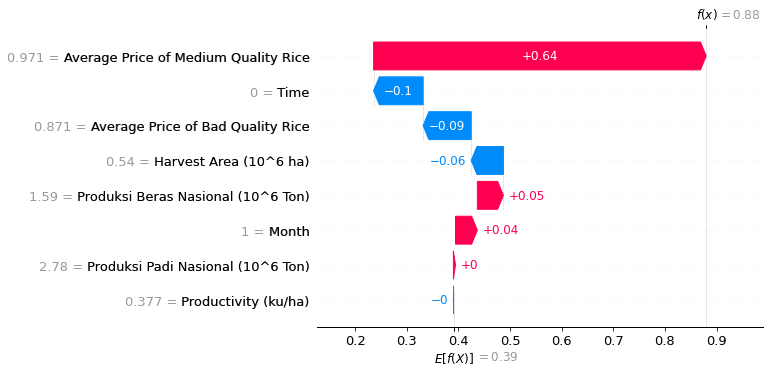

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_train,link="logit")

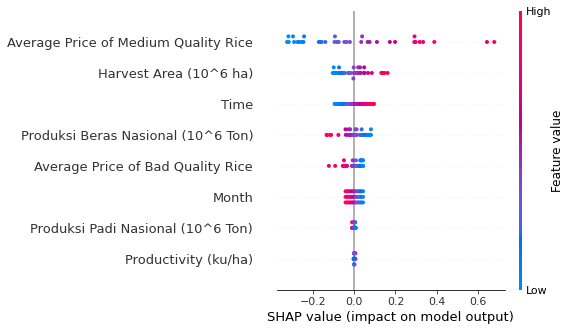

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

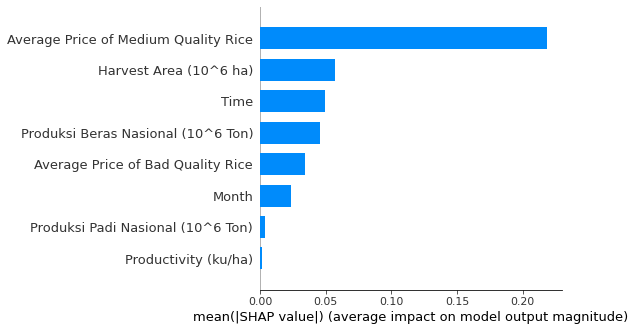

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_test)
shap_values = explainer(x_premium_test)

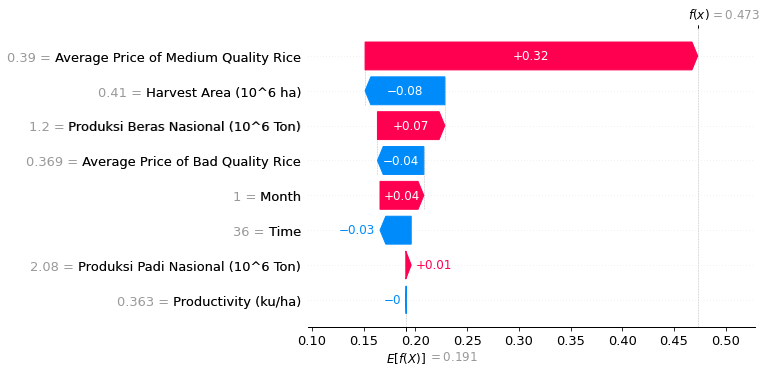

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_test,link="logit")

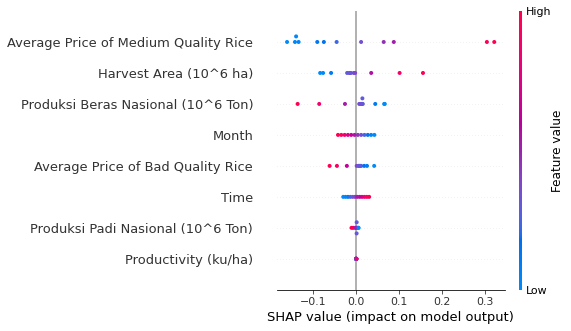

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

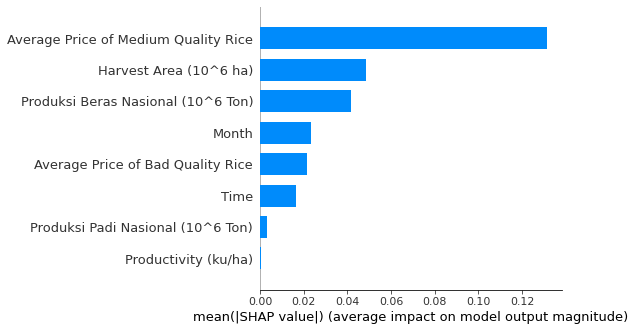

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(x_premium_train,HargaBerasPremium_train)

accuracy = regressor.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9779751736797522


Predicting on Train Data

In [ ]:
AvgPricePremium_train_with_randomforest = pd.Series(regressor.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_with_randomforest,'Train RF Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_with_randomforest = pd.Series(regressor.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_with_randomforest,'Test RF Premium')

# explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor)

Shap Explanation at Train Data

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_train,link="logit")

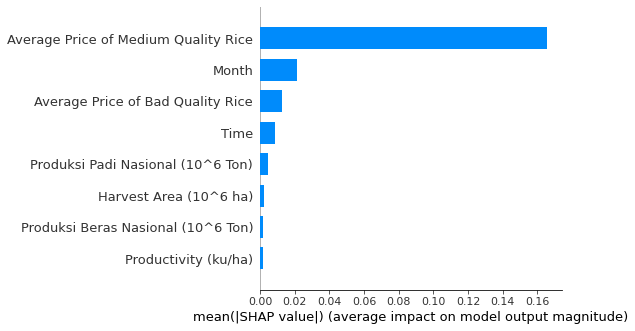

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type="bar")

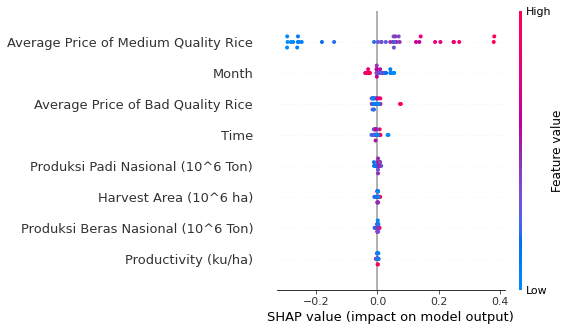

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shap Explanation at Test Data

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_test,link="logit")

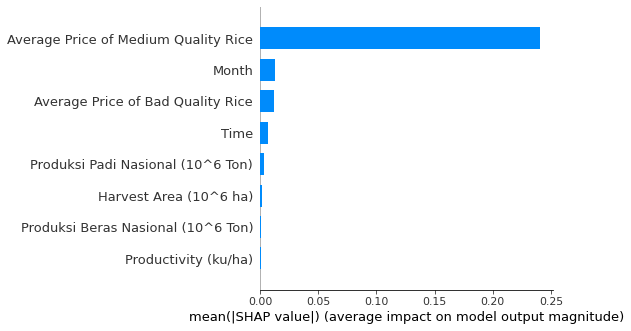

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type="bar")

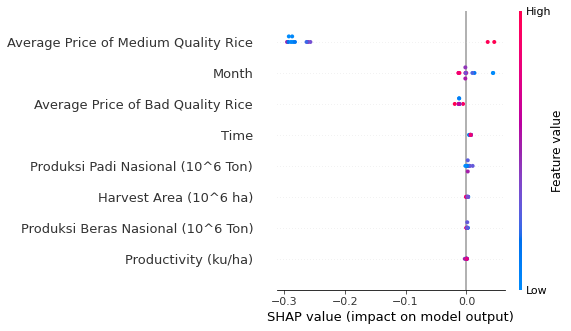

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

    The feature important that has the largest average SHAP value in the Random Forest method on Premium Quality Rice is Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
model2 = LinearRegression()
model2.fit(Time_train, HargaBerasMedium_train)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

Coefficients:  [-0.00229664]
Intercept:  0.49106849309369927


Predicting on Train Data

In [ ]:
AvgPriceMedium_train = pd.Series(model2.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train,'Train SLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred = pd.Series(model2.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred,'Test SLR Medium')

### Multiple Linear Regression
### Average Price of Medium Quality Rice

In [ ]:
regr_v2 = LinearRegression()
regr_v2.fit(x_medium_train, HargaBerasMedium_train)

print('Coefficients: ', regr_v2.coef_)
print ('Intercept: ',regr_v2.intercept_)

accuracy = regr_v2.score(x_medium_train,HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [ 4.36224415e-01  6.64173118e-01  2.43354045e-02 -2.09472043e-02
  2.69045621e-02  4.29502350e-02 -5.96904584e-04  1.39594750e-04]
Intercept:  -0.04733351038111061
Model Accuracy:  0.9603334885283522


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_v2 = pd.Series(regr_v2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_v2,'Train MLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_v2 = pd.Series(regr_v2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_v2,'Test MLR Medium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v2, x_medium_train)
shap_values = explainer(x_medium_train)

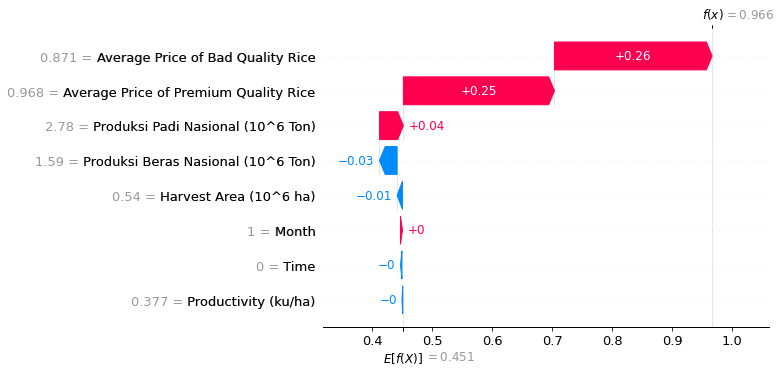

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values_v2 = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_v2, x_medium_train,link="logit")

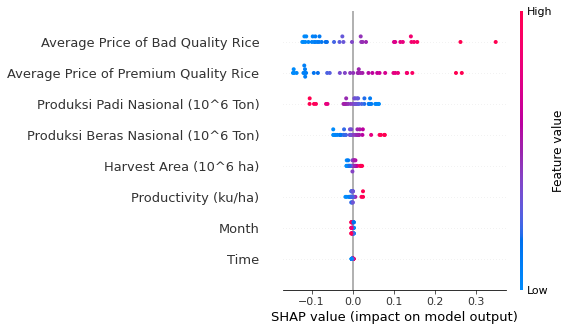

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_train)

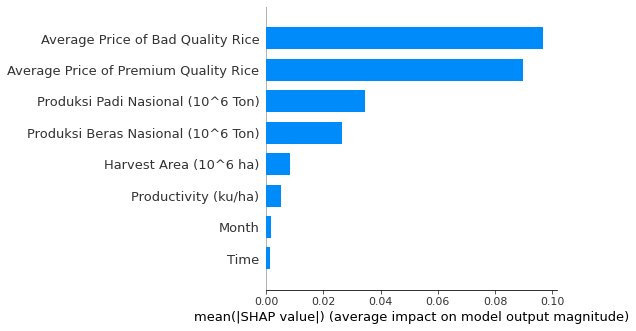

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Average Price of Bad Quality Rice. High values of the Average Price of Bad Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer_v2 = shap.LinearExplainer(regr_v2, x_medium_test)
shap_values_v2 = explainer_v2(x_medium_test)

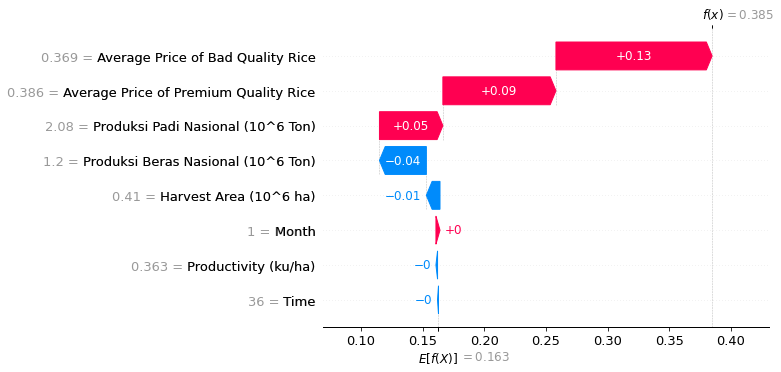

In [ ]:
shap.plots.waterfall(shap_values_v2[0])

In [ ]:
shap_values_v2 = explainer_v2.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v2.expected_value, shap_values_v2, x_medium_test,link="logit")

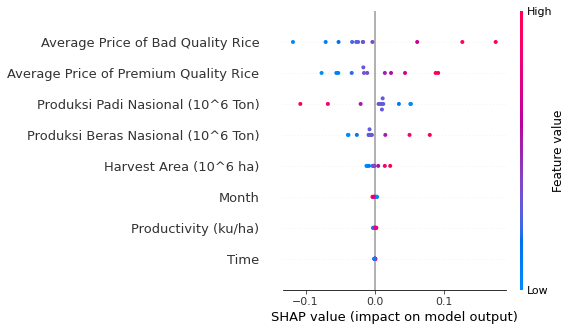

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test)

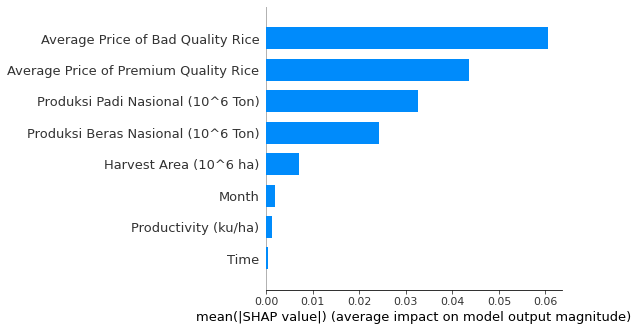

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Average Price of Bad Quality Rice. High values of the Average Price of Bad Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor2.fit(x_medium_train, HargaBerasMedium_train)

accuracy = regressor2.score(x_medium_train, HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9893955420246877


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_with_randomforest = pd.Series(regressor2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_with_randomforest,'Train RF Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_with_randomforest = pd.Series(regressor2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_with_randomforest,'Test RF Medium')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor2)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_train,link="logit")

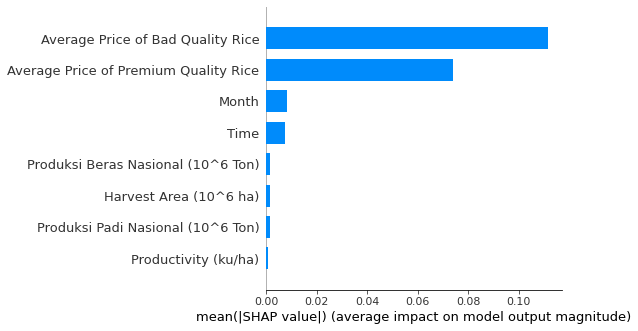

In [ ]:
shap.summary_plot(shap_values, x_medium_train, plot_type="bar")

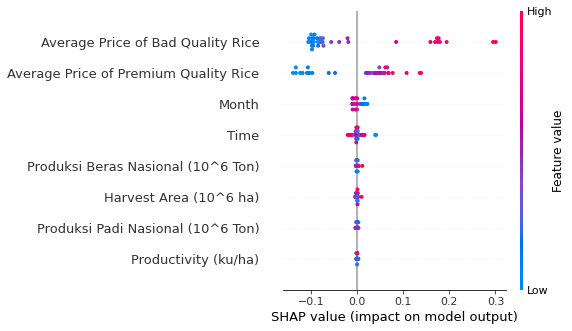

In [ ]:
shap.summary_plot(shap_values, x_medium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is  Average Price of Bad Quality Rice. High values of the Average Price of Bad Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_test,link="logit")

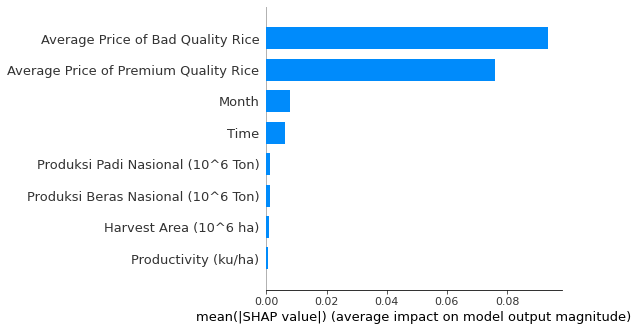

In [ ]:
shap.summary_plot(shap_values, x_medium_test, plot_type="bar")

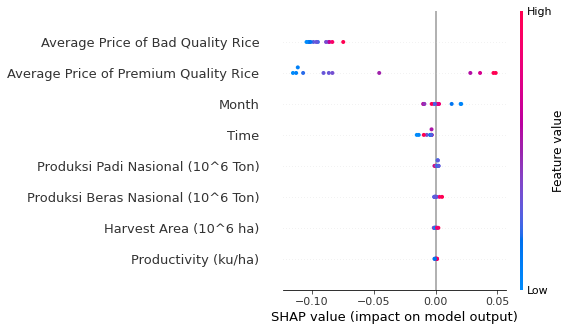

In [ ]:
shap.summary_plot(shap_values, x_medium_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is  Average Price of Bad Quality Rice. High values of the Average Price of Premium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
model3 = LinearRegression()
model3.fit(Time_train, HargaBerasLuarkualitas_train)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

accuracy = model3.score(Time_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.00594912]
Intercept:  0.5794418120525432
Model Accuracy:  0.12276611555519934


Predicting on Train Data

In [ ]:
AvgPriceBad_train = pd.Series(model3.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train,'Train SLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred = pd.Series(model3.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred,'Test SLR Bad')

### Multiple Linear Regression
### Average Price of Bad Quality Rice

In [ ]:
regr_v3 = LinearRegression()
regr_v3.fit(x_bad_train,HargaBerasLuarkualitas_train)

print('Coefficients: ', regr_v3.coef_)
print ('Intercept: ',regr_v3.intercept_)

accuracy = regr_v3.score(x_bad_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-9.68381093e-02  7.75522258e-01 -4.57345912e-01  2.98033684e-02
  8.59360755e-02 -6.28402178e-02 -1.20386806e-04 -3.80233427e-03]
Intercept:  0.3011777704979387
Model Accuracy:  0.9312503283850257


Predicting on Train Data

In [ ]:
AvgPriceBad_train_v2 = pd.Series(regr_v3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_v2,'Train MLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_v2 = pd.Series(regr_v3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_v2,'Test MLR Bad')

Explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v3, x_bad_train)
shap_values = explainer(x_bad_train)

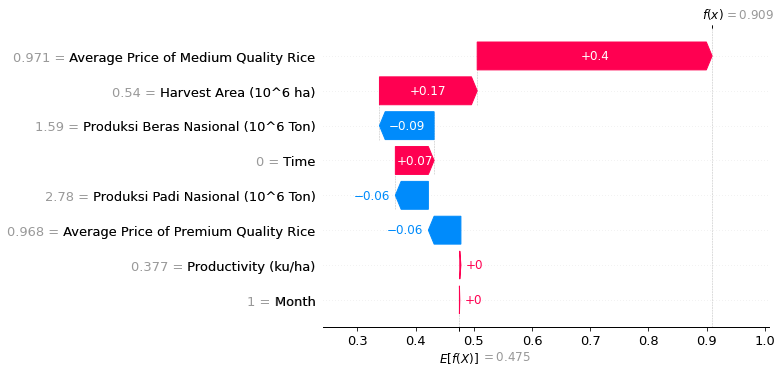

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

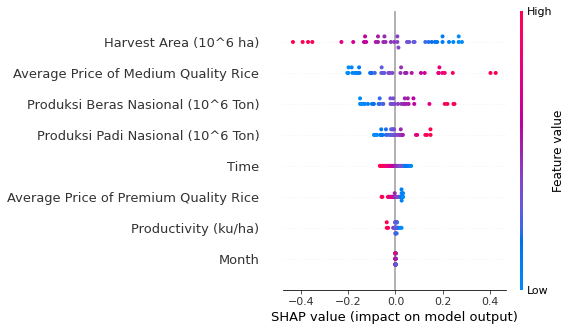

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

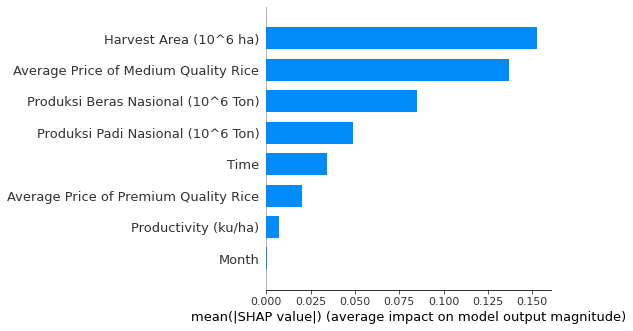

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Bad Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

Shapley on Test Data

In [ ]:
explainer_v3 = shap.LinearExplainer(regr_v3, x_bad_test)
shap_values_v3 = explainer_v3(x_bad_test)

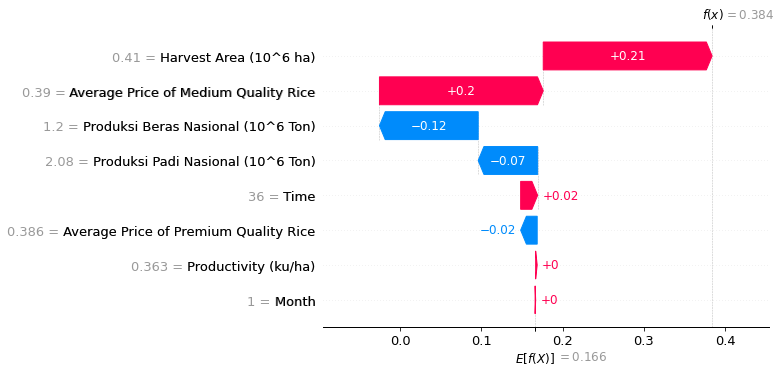

In [ ]:
shap.plots.waterfall(shap_values_v3[0])

In [ ]:
shap_values_v3 = explainer_v3.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v3.expected_value, shap_values_v3, x_bad_test,link="logit")

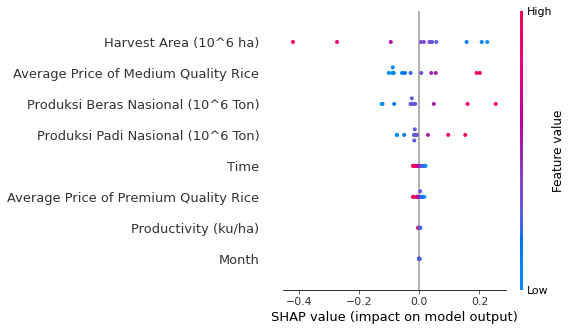

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test)

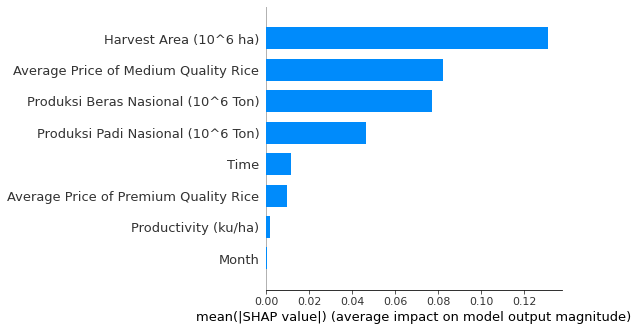

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Bad Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor3.fit(x_bad_train, HargaBerasLuarkualitas_train)

accuracy = regressor3.score(x_bad_train, HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9719046545330888


Predicting on Train Data

In [ ]:
AvgPriceBad_train_with_randomforest = pd.Series(regressor3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_with_randomforest,'Train RF Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_with_randomforest = pd.Series(regressor3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_with_randomforest,'Test RF Bad')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor3)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

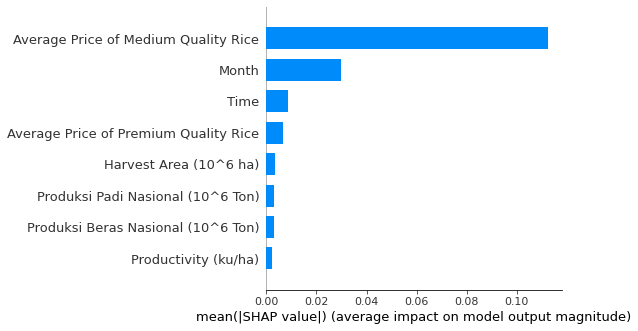

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type="bar")

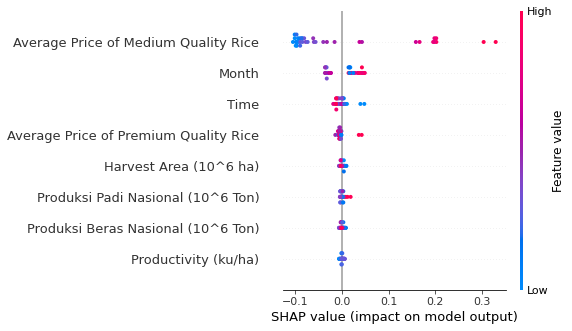

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_test,link="logit")

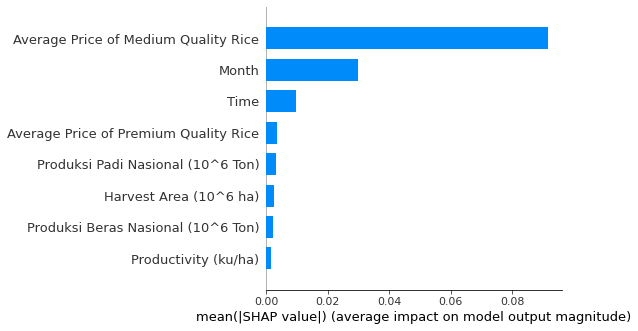

In [ ]:
shap.summary_plot(shap_values, x_bad_test, plot_type="bar")

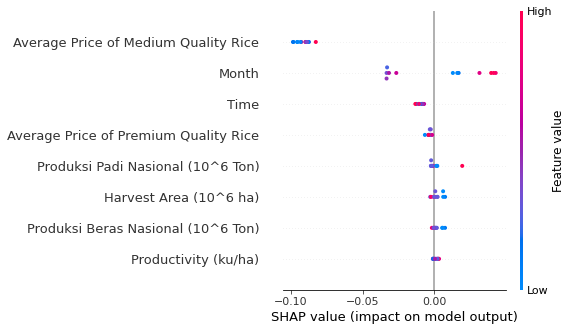

In [ ]:
shap.summary_plot(shap_values, x_bad_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Average Price of Medium Quality Rice. High values of the Month variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Returns the MinMaxScaler value to get the actual data 

Premium Rice

In [ ]:
HargaBerasPremium_test = HargaBerasPremium_test.to_numpy()
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (-1,1)) 
HargaBerasPremium_test = mmscalar_premium.inverse_transform(HargaBerasPremium_test)
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (12,))
HargaBerasPremium_test = pd.Series(HargaBerasPremium_test, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred = AvgPricePremium_pred.to_numpy()
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (-1,1)) 
AvgPricePremium_pred = mmscalar_premium.inverse_transform(AvgPricePremium_pred)
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (12,))
AvgPricePremium_pred = pd.Series(AvgPricePremium_pred, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_v2 = AvgPricePremium_pred_v2.to_numpy()
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (-1,1)) 
AvgPricePremium_pred_v2 = mmscalar_premium.inverse_transform(AvgPricePremium_pred_v2)
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (12,))
AvgPricePremium_pred_v2 = pd.Series(AvgPricePremium_pred_v2, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_with_randomforest = AvgPricePremium_pred_with_randomforest.to_numpy()
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (-1,1)) 
AvgPricePremium_pred_with_randomforest = mmscalar_premium.inverse_transform(AvgPricePremium_pred_with_randomforest)
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (12,))
AvgPricePremium_pred_with_randomforest = pd.Series(AvgPricePremium_pred_with_randomforest, index=x_premium_test.index)

Medium

In [ ]:
HargaBerasMedium_test = HargaBerasMedium_test.to_numpy()
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (-1,1)) 
HargaBerasMedium_test = mmscalar_medium.inverse_transform(HargaBerasMedium_test)
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (12,))
HargaBerasMedium_test = pd.Series(HargaBerasMedium_test, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred = AvgPriceMedium_pred.to_numpy()
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (-1,1)) 
AvgPriceMedium_pred = mmscalar_medium.inverse_transform(AvgPriceMedium_pred)
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (12,))
AvgPriceMedium_pred = pd.Series(AvgPriceMedium_pred, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_v2 = AvgPriceMedium_pred_v2.to_numpy()
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (-1,1)) 
AvgPriceMedium_pred_v2 = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_v2)
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (12,))
AvgPriceMedium_pred_v2 = pd.Series(AvgPriceMedium_pred_v2, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_with_randomforest = AvgPriceMedium_pred_with_randomforest.to_numpy()
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (-1,1)) 
AvgPriceMedium_pred_with_randomforest = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_with_randomforest)
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (12,))
AvgPriceMedium_pred_with_randomforest = pd.Series(AvgPriceMedium_pred_with_randomforest, index=x_medium_test.index)

Bad

In [ ]:
HargaBerasLuarkualitas_test= HargaBerasLuarkualitas_test.to_numpy()
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (-1,1)) 
HargaBerasLuarkualitas_test= mmscalar_bad.inverse_transform(HargaBerasLuarkualitas_test)
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (12,))
HargaBerasLuarkualitas_test= pd.Series(HargaBerasLuarkualitas_test, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred= AvgPriceBad_pred.to_numpy()
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (-1,1)) 
AvgPriceBad_pred= mmscalar_bad.inverse_transform(AvgPriceBad_pred)
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (12,))
AvgPriceBad_pred= pd.Series(AvgPriceBad_pred, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_v2= AvgPriceBad_pred_v2.to_numpy()
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (-1,1)) 
AvgPriceBad_pred_v2= mmscalar_bad.inverse_transform(AvgPriceBad_pred_v2)
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (12,))
AvgPriceBad_pred_v2= pd.Series(AvgPriceBad_pred_v2, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_with_randomforest= AvgPriceBad_pred_with_randomforest.to_numpy()
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (-1,1)) 
AvgPriceBad_pred_with_randomforest= mmscalar_bad.inverse_transform(AvgPriceBad_pred_with_randomforest)
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (12,))
AvgPriceBad_pred_with_randomforest= pd.Series(AvgPriceBad_pred_with_randomforest, index=x_bad_test.index)

### Collection of Visualizations

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

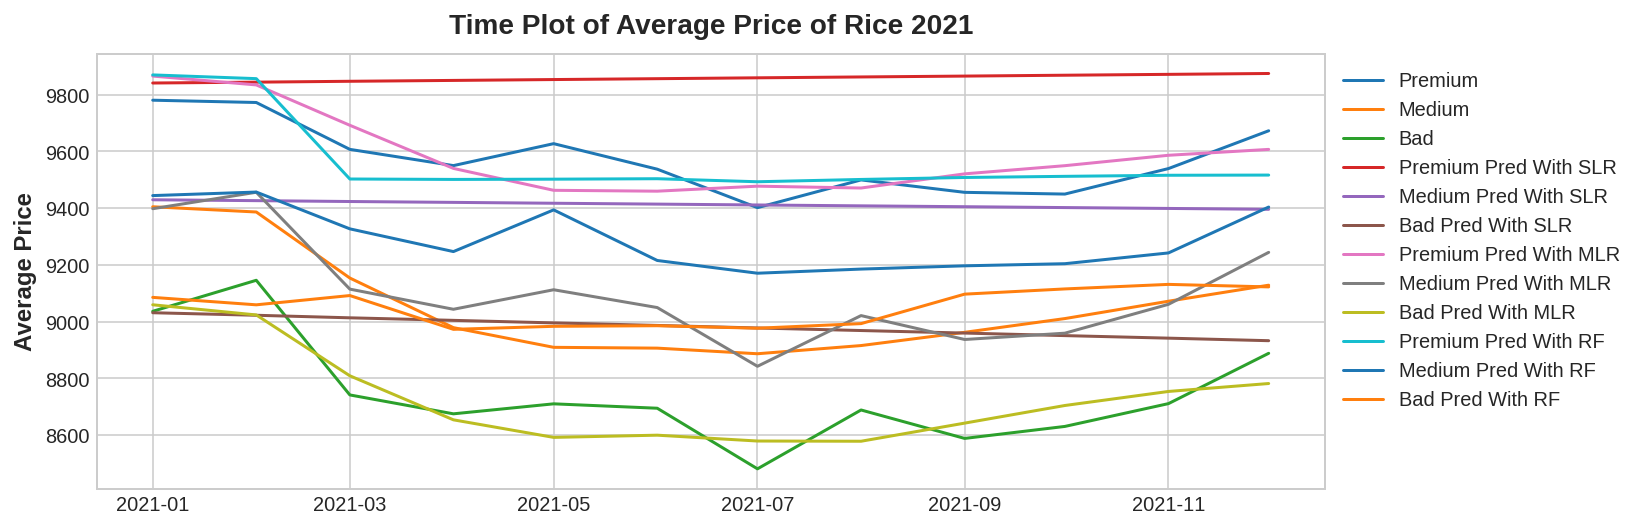

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(HargaBerasLuarkualitas_test,label='Bad')
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

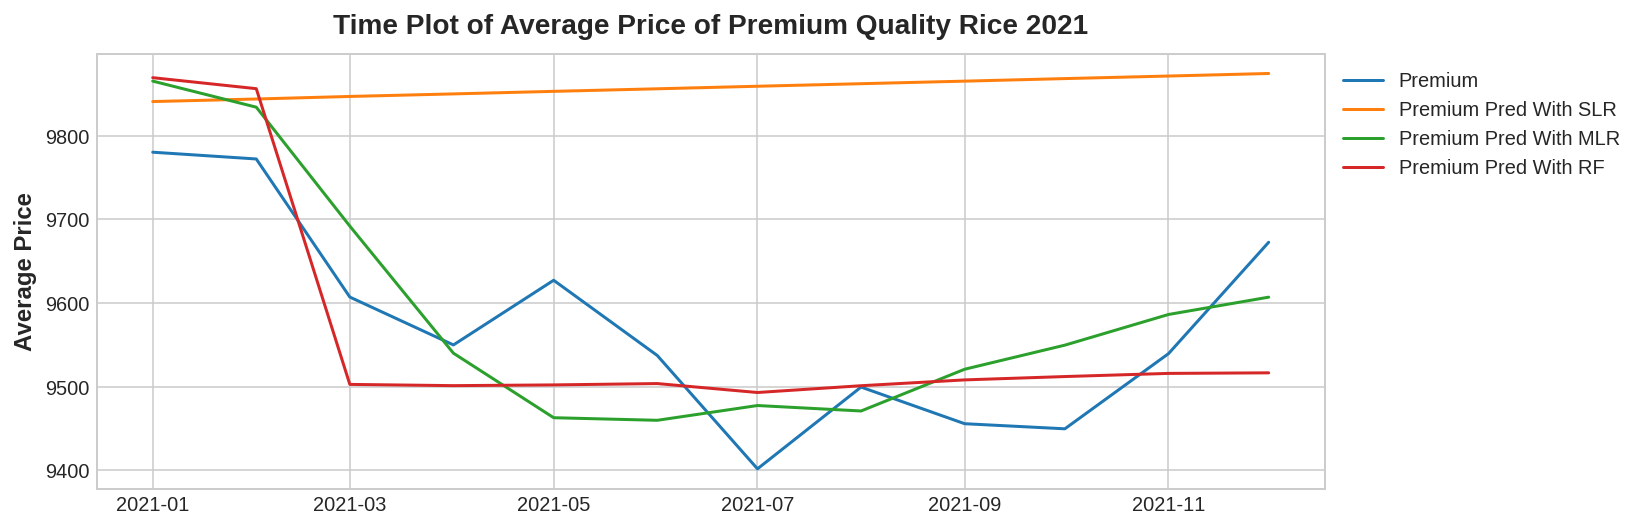

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.title('Time Plot of Average Price of Premium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

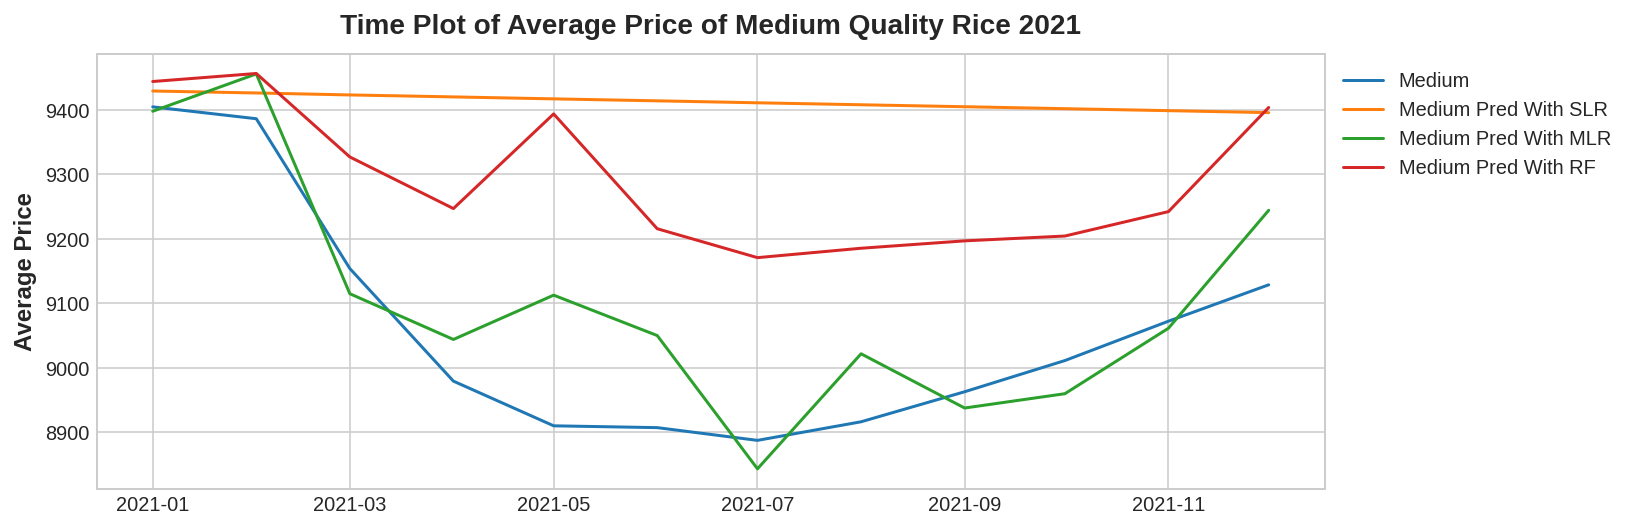

In [ ]:
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.title('Time Plot of Average Price of Medium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

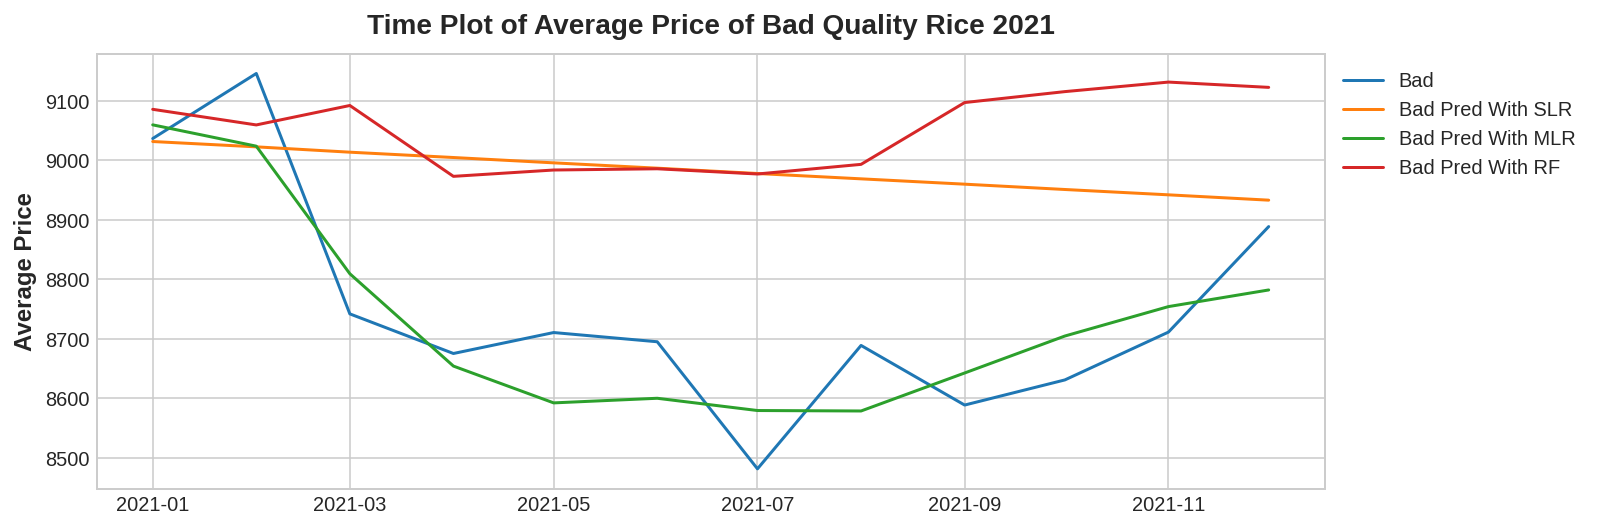

In [ ]:
plt.plot(HargaBerasLuarkualitas_test,label='Bad')  
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Bad Quality Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

Mean Absolute Error (MAE) 

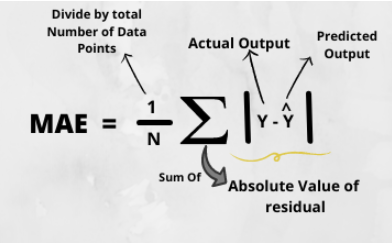

Mean Squared Error(MSE)

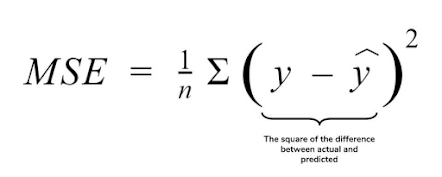

Mean Absolute Percentage Error (MAPE)

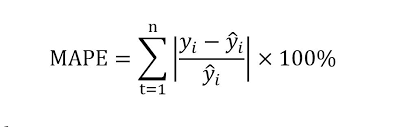

Root Mean Squared Error(RMSE) or root-mean-square deviation (RNSD)

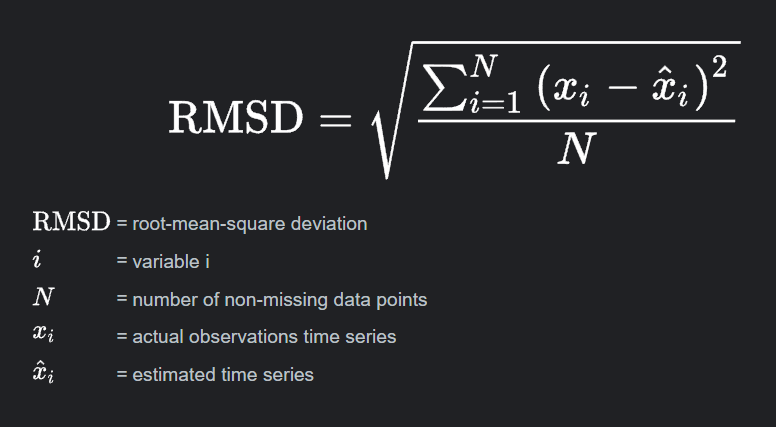


Root Mean Squared Log Error(RMSLE)

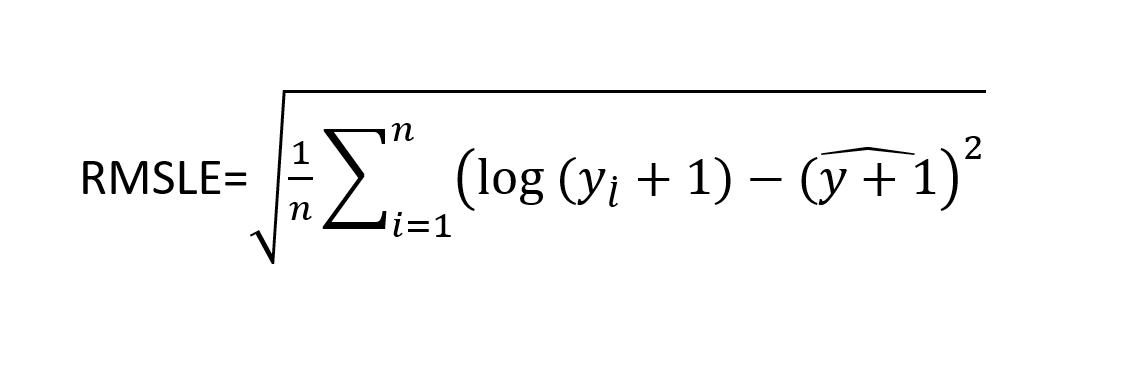

R Squared

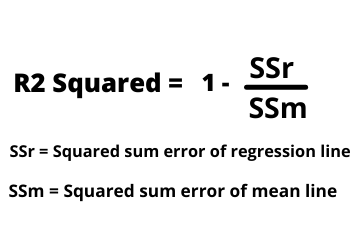

In [ ]:
data_eval_train = pd.DataFrame(evaluation_train)
data_eval_train

Train SLR Premium  Train MLR Premium  Train RF Premium  \
MAE                 0.199663           0.053659          0.026792   
MSE                 0.061601           0.005201          0.001380   
MAPE                1.109341           0.208021          0.088391   
R squared           0.016691           0.916983          0.977975   
RMSE                0.248196           0.072116          0.037146   
RMSLE              -1.393535          -2.629473         -3.292912   

           Train SLR Medium  Train MLR Medium  Train RF Medium  Train SLR Bad  \
MAE                0.174593          0.028788         0.016212       0.137865   
MSE                0.045610          0.001832         0.000490       0.027292   
MAPE               0.490324          0.069664         0.035887       0.307550   
R squared          0.012326          0.960333         0.989396       0.122766   
RMSE               0.213566          0.042799         0.022129       0.165202   
RMSLE             -1.543810         -3.151233        -3.810849      -1.800585   

           Train MLR Bad  Train RF Bad  
MAE             0.036118      0.020101  
MSE             0.002139      0.000874  
MAPE            0.085273      0.046580  
R squared       0.931250      0.971905  
RMSE            0.046248      0.029565  
RMSLE          -3.073736     -3.521170

In [ ]:
data_eval_test = pd.DataFrame(evaluation_test)
data_eval_test

Test SLR Premium  Test MLR Premium  Test RF Premium  \
MAE            2.890107e-01      7.358632e-02     7.417821e-02   
MSE            9.923400e-02      6.825210e-03     7.371670e-03   
MAPE           1.751580e+14      2.898343e+13     3.494515e+13   
R squared     -6.003244e+00      5.183243e-01     4.797590e-01   
RMSE           3.150143e-01      8.261483e-02     8.585843e-02   
RMSLE         -1.155137e+00     -2.493566e+00    -2.455056e+00   

           Test SLR Medium  Test MLR Medium  Test RF Medium  Test SLR Bad  \
MAE           2.656879e-01     5.516004e-02    1.738016e-01  1.687197e-01   
MSE           8.639026e-02     4.822646e-03    3.723693e-02  3.616265e-02   
MAPE          1.480969e+14     1.248780e+13    8.016463e+13  1.236908e+14   
R squared    -4.161004e+00     7.118924e-01   -1.224556e+00 -1.550581e+00   
RMSE          2.939222e-01     6.944527e-02    1.929687e-01  1.901648e-01   
RMSLE        -1.224440e+00    -2.667216e+00   -1.645227e+00 -1.659864e+00   

           Test MLR Bad   Test RF Bad  
MAE        5.158089e-02  2.099607e-01  
MSE        3.186120e-03  5.302181e-02  
MAPE       2.442093e+13  1.234848e+14  
R squared  7.752803e-01 -2.739671e+00  
RMSE       5.644573e-02  2.302646e-01  
RMSLE     -2.874476e+00 -1.468526e+00

In [ ]:
AvgPricePremium_pred_v2

Date
2021-01-01    9865.206095
2021-02-01    9834.008083
2021-03-01    9691.825112
2021-04-01    9539.876503
2021-05-01    9462.731345
2021-06-01    9459.636287
2021-07-01    9477.302853
2021-08-01    9470.775008
2021-09-01    9520.686497
2021-10-01    9549.502158
2021-11-01    9586.151120
2021-12-01    9606.882902
dtype: float64